# Marathon Progression Visualization

In this notebook, we'll visualize the progression of marathon performance over time. We'll analyze factors such as finishing times, splits, and trends to gain insights into the improvement or deterioration of marathon runners' performance.

## Data

We'll start by loading and preprocessing the data. The dataset includes information such as race date, finishing time, split times, and runner demographics. We'll clean the data, handle missing values, and perform any necessary feature engineering. The data is sourced from the [World Athletics](https://worldathletics.org/ebooks/2017/WCH/index.html#page=790) for female marathon runners and [World Athletics](https://worldathletics.org/ebooks/2017/WCH/index.html#page=66) for male runners. Newer records have been manually added and oldder data is scrapped from [Wikipedia](https://en.wikipedia.org/wiki/Marathon_world_record_progression).

Edit - I've decided to use the web scrapping method to get the data from Wikipedia. This is because the data from World Athletics is not as comprehensive as I would like it to be. The data from Wikipedia is more comprehensive and has more records.

However I will demonstrate how to read the excel file from World Athletics and then use the data from Wikipedia to supplement the data.

## Exploratory Data Analysis (EDA)

Next, we'll conduct exploratory data analysis to understand the characteristics of the dataset. We'll visualize distributions of finishing times, splits, and other relevant variables. This will help us identify patterns and outliers that may influence our analysis.

## Marathon Performance Over Time

Using various visualization techniques such as line plots, scatter plots, and histograms, we'll visualize marathon performance over time. We'll analyze trends in finishing times, examine the impact of external factors like weather conditions or course changes, and identify any significant changes in performance.

## Demographic Analysis

We'll also explore how marathon performance varies across different demographic groups such as age, gender, and nationality. Visualizing performance metrics for each group will provide insights into potential disparities and trends.

## Conclusion

Finally, we'll summarize our findings and draw conclusions based on the visualizations. We'll discuss any insights gained from the analysis and potential implications for training strategies, event organization, or future research.

Let's get started!

---

**Author Information:**

- **Name:** Brian Koech
- **Email:** info@libranconsult.com
- **GitHub:** [brightmaraba](https://github.com/brightmaraba)
- **Twitter:** [@LibranTechie](https://twitter.com/librantechie)


In [429]:
# Import required modules
import io
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import datetime
from matplotlib.animation import FuncAnimation

plt.style.use('../styles/plotstyle.mplstyle') # Use custom style

# Remove warnings
import warnings

warnings.filterwarnings("ignore")

In [430]:
%matplotlib inline

In [431]:
# set the directories
base_path = os.path.dirname(os.path.realpath("__file__"))
root_path = os.path.join(base_path, "..")
data_path = os.path.join(root_path, "data")
images_path = os.path.join(root_path, "images")


In [432]:
# Demo only - Readind exccel file to a dataframe
# We set the directories to make it easier to read the file
# You must install the openpyxl library to read excel files
# Use pip install openpyxl or conda install openpyxl
men_marathon_data = pd.read_excel(os.path.join(data_path, 'marathon_progression_men_1950_date.xlsx'))
women_marathon_data = pd.read_excel(os.path.join(data_path, 'marathon_progression_women_1950_date.xlsx'))

# Print the first / last 5 rows of each dataframe
men_marathon_data.head()
# women_marathon_data.tail()


,TIME,NAME,NATIONALITY,DATE,LOCATION
0,02:20:42,Jim Peters,United Kingdom,"June 14, 1952",Polytechnic Marathon
1,02:18:40,Jim Peters,United Kingdom,"June 13, 1953",Polytechnic Marathon
2,02:18:35,Jim Peters,United Kingdom,"October 4, 1953",Turku Marathon
3,02:17:39,Jim Peters,United Kingdom,"June 26, 1954",Polytechnic Marathon
4,02:15:17,Sergei Popov,Soviet Union,"August 24, 1958","Stockholm, Sweden"


In [435]:
# Web Scraping
# Define a function to connect to wikipedia and scrape marathon data
def get_data(url) -> list: # type: ignore
    data = []
    response = requests.get(url)
    try:
        soup = BeautifulSoup(response.content, 'html.parser')
        marathon_table = soup.find_all('table', {'class': 'wikitable'})
        marathon_list = pd.read_html(io.StringIO(str(marathon_table)))
        men_data = pd.DataFrame(marathon_list[0])
        women_data = pd.DataFrame(marathon_list[1])

        data.append(men_data)
        data.append(women_data)

        return data
    except:
        print("Error: Unable to connect to the website")

wiki_url = "https://en.wikipedia.org/wiki/Marathon_world_record_progression"

data_df = get_data(wiki_url)
men_data_df = data_df[0]
women_data_df = data_df[1]

# Check the first and last 5 rows of the respective dataframes
men_data_df.head()
#women_data_df.tail()

,Time,Name,Nationality,Date,Event/Place,Source,Notes
0,2:55:18.4,Johnny Hayes,United States,"July 24, 1908","London Olympics, England",IAAF[53],Time was officially recorded as 2:55:18 2/5.[5...
1,2:52:45.4,Robert Fowler,United States,"January 1, 1909","Yonkers,[nb 5] United States",IAAF[53],Note.[56]
2,2:46:52.8,James Clark,United States,"February 12, 1909","New York City, United States",IAAF[53],Note.[56]
3,2:46:04.6,Albert Raines,United States,"May 8, 1909","New York City, United States",IAAF[53],Note.[56]
4,2:42:31.0,Henry Barrett,United Kingdom,"May 8, 1909[nb 6]","Polytechnic Marathon, London, England",IAAF[53],Note.[56]


#### Data Preparation
Data cleaning, also known as data cleansing or scrubbing, is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset. It's an essential step in the data preparation process, ensuring that data is accurate, consistent, and usable for analysis or modeling. Issies to be addressed may include but not limited to the following:
- Join the men and women data
- Remove duplicates
- Clean the data
- Handle missing values
- Inconsistent data formating.


In [437]:
# Add column to identify men / women before concatenating the dataframes
men_data_df['Sex'] = 'M'
women_data_df['Sex'] = 'W'

# Confirm the column has been added
#men_data_df.head()
women_data_df.tail()

,Time,Name,Nationality,Date,Event/Place,Source,Notes,Sex
38,2:15:25 Mx,Paula Radcliffe,United Kingdom,"April 13, 2003",London Marathon,"IAAF,[53] ARRS[10]",First world record for the women's marathon ra...,W
39,2:17:42 Wo,Paula Radcliffe,Great Britain,"April 17, 2005",London Marathon,IAAF[106],NaN,W
40,2:17:01 Wo,Mary Jepkosgei Keitany,Kenya,"April 23, 2017",London Marathon,IAAF[107],NaN,W
41,2:14:04 Mx,Brigid Kosgei,Kenya,"October 13, 2019",Chicago Marathon,IAAF[108],NaN,W
42,2:11:53 Mx,Tigst Assefa,Ethiopia,"September 24, 2023",Berlin Marathon,World Athletics[109],First woman to break the 2:12:00 barrier in th...,W


In [438]:
# Join the dataframes
marathon_data_df = pd.concat([men_data_df, women_data_df], axis=0, ignore_index=True)
marathon_data_df.head()
#marathon_data_df.tail()

,Time,Name,Nationality,Date,Event/Place,Source,Notes,Sex
0,2:55:18.4,Johnny Hayes,United States,"July 24, 1908","London Olympics, England",IAAF[53],Time was officially recorded as 2:55:18 2/5.[5...,M
1,2:52:45.4,Robert Fowler,United States,"January 1, 1909","Yonkers,[nb 5] United States",IAAF[53],Note.[56],M
2,2:46:52.8,James Clark,United States,"February 12, 1909","New York City, United States",IAAF[53],Note.[56],M
3,2:46:04.6,Albert Raines,United States,"May 8, 1909","New York City, United States",IAAF[53],Note.[56],M
4,2:42:31.0,Henry Barrett,United Kingdom,"May 8, 1909[nb 6]","Polytechnic Marathon, London, England",IAAF[53],Note.[56],M


In [439]:
# Standardize the date column by converting to datetime
marathon_data_df['Date'] = pd.to_datetime(marathon_data_df['Date'], errors='coerce')
marathon_data_df.head()

,Time,Name,Nationality,Date,Event/Place,Source,Notes,Sex
0,2:55:18.4,Johnny Hayes,United States,1908-07-24,"London Olympics, England",IAAF[53],Time was officially recorded as 2:55:18 2/5.[5...,M
1,2:52:45.4,Robert Fowler,United States,1909-01-01,"Yonkers,[nb 5] United States",IAAF[53],Note.[56],M
2,2:46:52.8,James Clark,United States,1909-02-12,"New York City, United States",IAAF[53],Note.[56],M
3,2:46:04.6,Albert Raines,United States,1909-05-08,"New York City, United States",IAAF[53],Note.[56],M
4,2:42:31.0,Henry Barrett,United Kingdom,NaT,"Polytechnic Marathon, London, England",IAAF[53],Note.[56],M


In [441]:
# Check for missing values
marathon_data_df.isnull().sum()

Time            0
Name            0
Nationality     0
Date            3
Event/Place     0
Source          0
Notes          48
Sex             0
dtype: int64

In [442]:
# Check for NaN values
marathon_data_df.isna().sum()

Time            0
Name            0
Nationality     0
Date            3
Event/Place     0
Source          0
Notes          48
Sex             0
dtype: int64

In [443]:
# We have noted that the Date column has 3 NaT values - Not a Time
# Check for NaT values in the Date column
NaT_values = marathon_data_df[marathon_data_df['Date'].isna()]
NaT_values

,Time,Name,Nationality,Date,Event/Place,Source,Notes,Sex
4,2:42:31.0,Henry Barrett,United Kingdom,NaT,"Polytechnic Marathon, London, England",IAAF[53],Note.[56],M
54,3:37:07,Merry Lepper,United States,NaT,"Culver City, United States",IAAF[53],Disputed (short course).[95],W
56,3:19:33,Mildred Sampson,New Zealand,NaT,"Auckland, New Zealand",IAAF[53],Disputed by ARRS as a time trial.[nb 9][98],W


In [444]:
# We can see that the NaT values are due to the 'Date' column containing anything else instead of a date
# We can either drop the rows or replace the values with a the correct date if we can find it
# In this case, I will manually replace the values with the correct date from the wikipedia page
condition_a = marathon_data_df['Name'] == 'Henry Barrett'
h_barrett_date = datetime.datetime(1909, 5, 1)
condition_b = marathon_data_df['Name'] == 'Merry Lepper'
m_lepper_date = datetime.datetime(1963, 12, 16)
condition_c = marathon_data_df['Name'] == 'Mildred Sampson'
m_sampson_date = datetime.datetime(1964, 6, 21)

# Replace the NaT values with the correct date
marathon_data_df.loc[condition_a, 'Date'] = h_barrett_date
marathon_data_df.loc[condition_b, 'Date'] = m_lepper_date
marathon_data_df.loc[condition_c, 'Date'] = m_sampson_date

# Check for NaT values in the Date column to confirm that they have been replaced
NaT_values = marathon_data_df[marathon_data_df['Date'].isna()]
NaT_values

,Time,Name,Nationality,Date,Event/Place,Source,Notes,Sex


In [445]:
# The notes column has a lot of missing values
# We can drop the column
marathon_data_df = marathon_data_df.drop(columns='Notes')

In [446]:
# Recheck for missing values to confirm that the changes have been made
marathon_data_df.isnull().sum()

Time           0
Name           0
Nationality    0
Date           0
Event/Place    0
Source         0
Sex            0
dtype: int64

In [447]:
# Check and remove duplicated rows
duplicate_rows = marathon_data_df[marathon_data_df.duplicated()]
duplicate_rows

,Time,Name,Nationality,Date,Event/Place,Source,Sex


In [448]:
# Sort the dataframe by date of the marathon
marathon_data_df = marathon_data_df.sort_values(by='Date', ascending=True)
marathon_data_df.head(10) # Check the first 10 rows - women started competing in later

,Time,Name,Nationality,Date,Event/Place,Source,Sex
0,2:55:18.4,Johnny Hayes,United States,1908-07-24,"London Olympics, England",IAAF[53],M
1,2:52:45.4,Robert Fowler,United States,1909-01-01,"Yonkers,[nb 5] United States",IAAF[53],M
2,2:46:52.8,James Clark,United States,1909-02-12,"New York City, United States",IAAF[53],M
4,2:42:31.0,Henry Barrett,United Kingdom,1909-05-01,"Polytechnic Marathon, London, England",IAAF[53],M
3,2:46:04.6,Albert Raines,United States,1909-05-08,"New York City, United States",IAAF[53],M
5,2:40:34.2,Thure Johansson,Sweden,1909-08-31,"Stockholm, Sweden",IAAF[53],M
6,2:38:16.2,Harry Green,United Kingdom,1913-05-12,Polytechnic Marathon,IAAF[53],M
7,2:36:06.6,Alexis Ahlgren,Sweden,1913-05-31,Polytechnic Marathon,IAAF[53],M
8,2:38:00.8,Umberto Blasi,Italy,1914-11-29,"Legnano, Italy",ARRS[10],M
52,5:40:xx,Marie-Louise Ledru,France,1918-09-29,Tour de Paris Marathon,ARRS[10],W


In [449]:
# Save the dataframe to a csv file
marathon_data_df.to_csv(os.path.join(data_path, 'marathon_data.csv'), index=False)

#### CSV Check
- We can run an eye through the csv file to see what the data looks like.
- We can note that some data in the time columns are not in the right format. We will still need to clean this data.
- For example the time for index 52 is 5:40:xx -we can replace this with 5:40:00
- There are unwanted characters in the data such as the mx, wo in the time columns. We will need to remove these.
- mx and wo signify women races paced by men (Mx) and womens only (Wo)
- Some timing data does not include the milliseconds. Let's remove all millisenconds from the column.


In [450]:
# Replace the time of atthlete Marie-Louise Ledru with the correct time
condition_d = marathon_data_df['Name'] == 'Marie-Louise Ledru'
m_ledru_time = '5:40:00.0'
marathon_data_df.loc[condition_d, 'Time'] = m_ledru_time

# Confirm that the time has been replaced
marathon_data_df.head(20)

,Time,Name,Nationality,Date,Event/Place,Source,Sex
0,2:55:18.4,Johnny Hayes,United States,1908-07-24,"London Olympics, England",IAAF[53],M
1,2:52:45.4,Robert Fowler,United States,1909-01-01,"Yonkers,[nb 5] United States",IAAF[53],M
2,2:46:52.8,James Clark,United States,1909-02-12,"New York City, United States",IAAF[53],M
4,2:42:31.0,Henry Barrett,United Kingdom,1909-05-01,"Polytechnic Marathon, London, England",IAAF[53],M
3,2:46:04.6,Albert Raines,United States,1909-05-08,"New York City, United States",IAAF[53],M
5,2:40:34.2,Thure Johansson,Sweden,1909-08-31,"Stockholm, Sweden",IAAF[53],M
6,2:38:16.2,Harry Green,United Kingdom,1913-05-12,Polytechnic Marathon,IAAF[53],M
7,2:36:06.6,Alexis Ahlgren,Sweden,1913-05-31,Polytechnic Marathon,IAAF[53],M
8,2:38:00.8,Umberto Blasi,Italy,1914-11-29,"Legnano, Italy",ARRS[10],M
52,5:40:00.0,Marie-Louise Ledru,France,1918-09-29,Tour de Paris Marathon,ARRS[10],W


In [451]:
# Remove all milliseconds from the time column
# Then remove special characters from the time column
marathon_data_df["Time"] = marathon_data_df["Time"].apply(lambda x: x.split(".")[0])
marathon_data_df["Time"] = marathon_data_df["Time"].apply(lambda x: x.split(" ")[0])
marathon_data_df.head(20)
marathon_data_df.tail(20)

,Time,Name,Nationality,Date,Event/Place,Source,Sex
86,2:20:43,Tegla Loroupe,Kenya,1999-09-26,Berlin Marathon,"IAAF,[53] ARRS[10]",W
41,2:05:42,Khalid Khannouchi,Morocco,1999-10-24,Chicago Marathon,"IAAF,[53] ARRS[10]",M
87,2:19:46,Naoko Takahashi,Japan,2001-09-30,Berlin Marathon,"IAAF,[53] ARRS[10]",W
88,2:18:47,Catherine Ndereba,Kenya,2001-10-07,Chicago Marathon,"IAAF,[53] ARRS[10]",W
42,2:05:38,Khalid Khannouchi,United States,2002-04-14,London Marathon,"IAAF,[53] ARRS[10]",M
89,2:17:18,Paula Radcliffe,United Kingdom,2002-10-13,Chicago Marathon,"IAAF,[53] ARRS[10]",W
90,2:15:25,Paula Radcliffe,United Kingdom,2003-04-13,London Marathon,"IAAF,[53] ARRS[10]",W
43,2:04:55,Paul Tergat,Kenya,2003-09-28,Berlin Marathon,"IAAF,[53] ARRS[10]",M
91,2:17:42,Paula Radcliffe,Great Britain,2005-04-17,London Marathon,IAAF[106],W
44,2:04:26,Haile Gebrselassie,Ethiopia,2007-09-30,Berlin Marathon,"IAAF,[53] ARRS[10]",M


In [452]:
# Dump final cleaned data to a csv file
marathon_data_df.to_csv(os.path.join(data_path, 'marathon_data_cleaned.csv'), index=False)
# Always good to run an eye on the csv file to check if everything is as expected especially for small datasets

#### Exploratory Data Analysis [EDA]

- Exploratory Data Analysis (EDA) is a process used in statistics and data science to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
- It enables one to understand the data’s underlying patterns, spot anomalies, test a hypothesis, or check assumptions with the help of summary statistics and graphical representations.
- EDA is a crucial step before formal modeling or hypothesis testing, providing a context for developing more precise questions and choosing appropriate techniques for further analysis.


##### Step 1: Descriptive Statistics

In [453]:
# Shape of the dataframe
marathon_data_df.shape # 95 rows and 7 columns

(95, 7)

In [454]:
# More information about the dataframe
marathon_data_df.info() # Check the data types of each column etc

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 51
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         95 non-null     object        
 1   Name         95 non-null     object        
 2   Nationality  95 non-null     object        
 3   Date         95 non-null     datetime64[ns]
 4   Event/Place  95 non-null     object        
 5   Source       95 non-null     object        
 6   Sex          95 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.9+ KB


In [455]:
# Convert the time column to a timedelta object
marathon_data_df['Time'] = pd.to_timedelta(marathon_data_df['Time'])
#

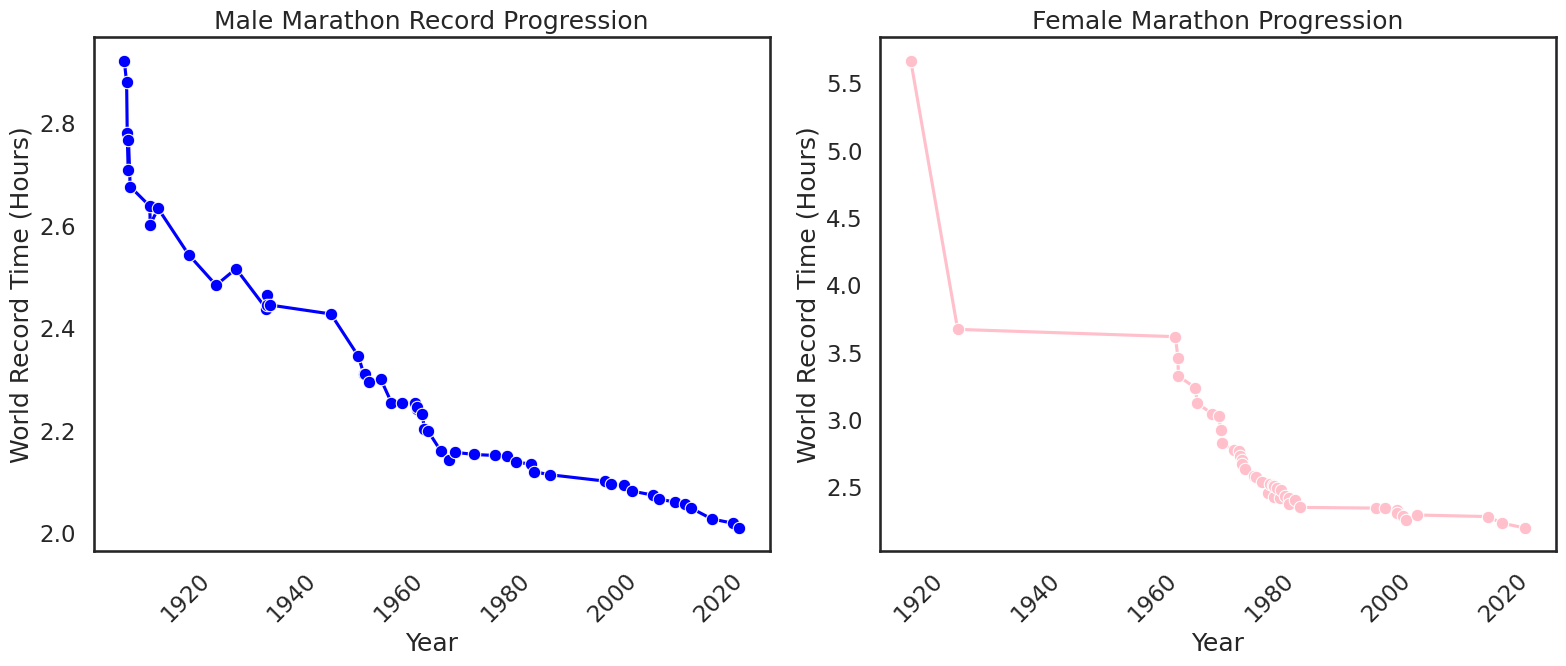

In [457]:
# Plot the progression of the marathon world record
# Separate plots for male and female marathon times over the years
plt.figure(figsize=(16, 7))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

# Male
plt.subplot(1, 2, 1)
male_times = marathon_data_df[marathon_data_df["Sex"] == "M"]
sns.lineplot(
    x="Date",
    y=male_times["Time"].dt.total_seconds() / 3600,
    data=male_times,
    marker="o",
    color="blue",
)

plt.title("Male Marathon Record Progression")
plt.xlabel("Year")
plt.ylabel("World Record Time (Hours)")
plt.xticks(rotation=45)

# Female
plt.subplot(1, 2, 2)
female_times = marathon_data_df[marathon_data_df["Sex"] == "W"]
sns.lineplot(
    x="Date",
    y=female_times["Time"].dt.total_seconds() / 3600,
    data=female_times,
    marker="o",
    color="pink",
)
plt.title("Female Marathon Progression")
plt.xlabel("Year")
plt.ylabel("World Record Time (Hours)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

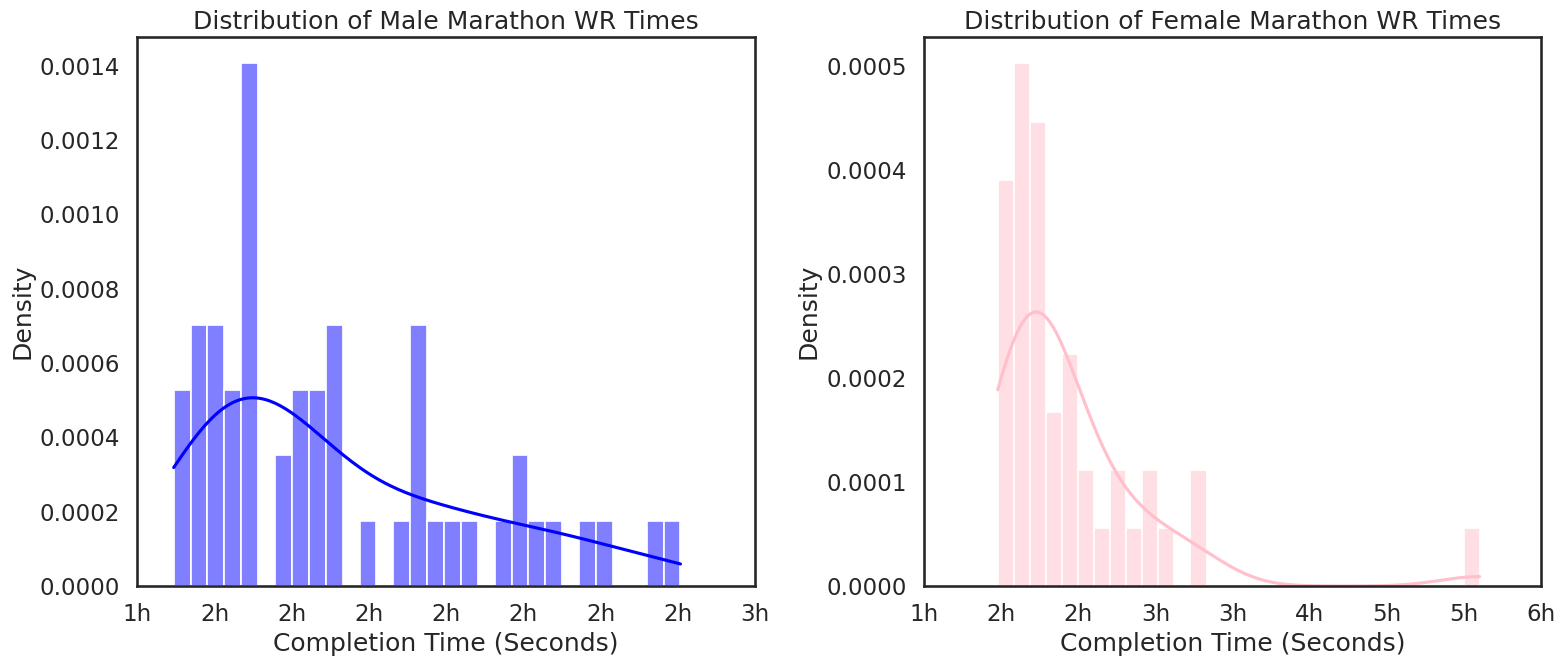

In [460]:
# Plotting the distribution of marathon completion times for male and female runners side by side for comparison

marathon_data_df["Time_seconds"] = marathon_data_df["Time"].dt.total_seconds()

plt.figure(figsize=(16, 7))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

# Male
plt.subplot(1, 2, 1)
sns.histplot(
    data=marathon_data_df[marathon_data_df["Sex"] == "M"],
    x="Time_seconds",
    color="blue",
    bins=30,
    kde=True,
    stat="density",
)
plt.title("Distribution of Male Marathon WR Times")
plt.xlabel("Completion Time (Seconds)")
plt.ylabel("Density")
# Convert x-axis labels back to hours for readability
x_ticks_hours = plt.xticks()[0]
new_labels = [f"{int(x / 3600)}h" for x in x_ticks_hours]
plt.xticks(x_ticks_hours, new_labels)

# Female
plt.subplot(1, 2, 2)
sns.histplot(
    data=marathon_data_df[marathon_data_df["Sex"] == "W"],
    x="Time_seconds",
    color="pink",
    bins=30,
    kde=True,
    stat="density",
)
plt.title("Distribution of Female Marathon WR Times")
plt.xlabel("Completion Time (Seconds)")
plt.ylabel("Density")
# Convert x-axis labels back to hours for readability
x_ticks_hours = plt.xticks()[0]
new_labels = [f"{int(x / 3600)}h" for x in x_ticks_hours]
plt.xticks(x_ticks_hours, new_labels)

plt.tight_layout()
plt.show()

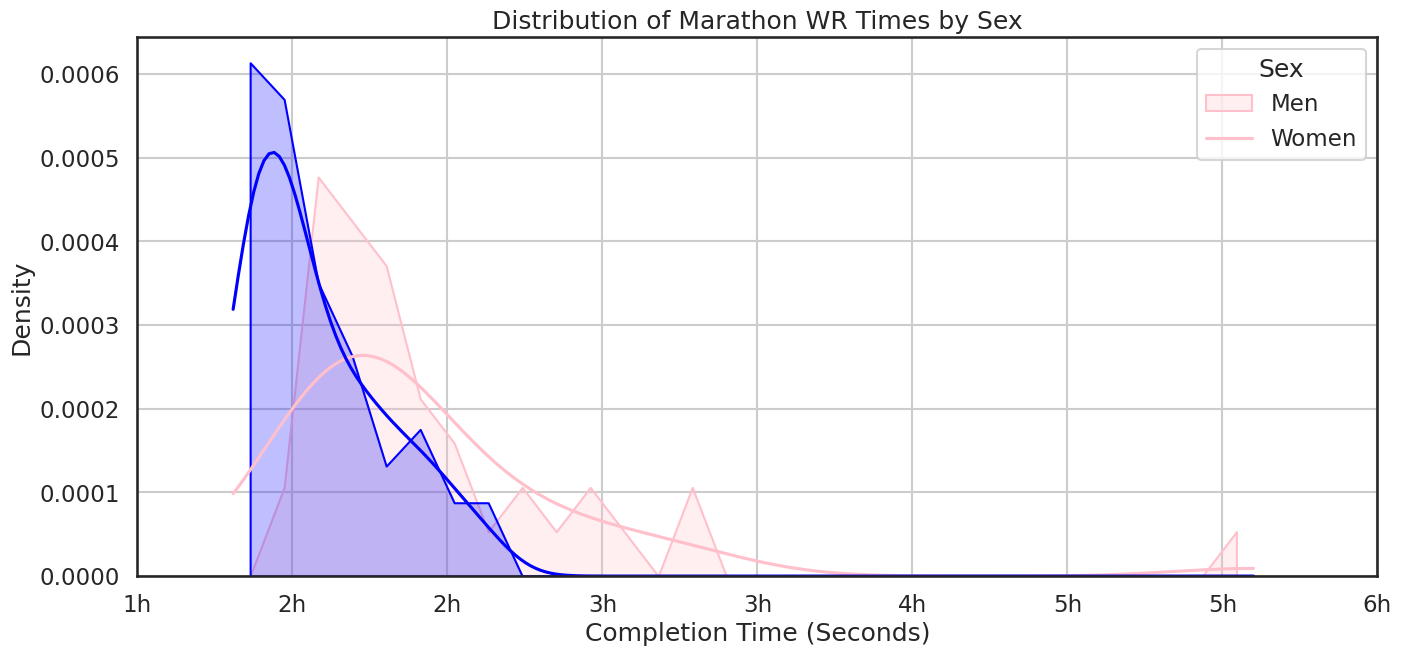

In [462]:
# Distribution of marathon record times
# Convert 'Time' from timedelta to total seconds for plotting
marathon_data_df["Time_seconds"] = marathon_data_df["Time"].dt.total_seconds()

plt.figure(figsize=(16, 7))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

# Plotting the distribution of marathon completion times for both male and female runners using total seconds
sns.histplot(
    data=marathon_data_df,
    x="Time_seconds",
    hue="Sex",
    element="poly",
    bins=30,
    kde=True,
    palette={"M": "blue", "W": "pink"},
    stat="density",
    common_norm=False,
)
plt.title("Distribution of Marathon WR Times by Sex")
plt.xlabel("Completion Time (Seconds)")
plt.ylabel("Density")
plt.grid(True)
plt.legend(title="Sex", labels=["Men", "Women"])

# Convert x-axis labels back to hours for readability
x_ticks_hours = plt.xticks()[0]
new_labels = [f"{int(x / 3600)}h" for x in x_ticks_hours]
plt.xticks(x_ticks_hours, new_labels)

plt.show()

<Figure size 1600x700 with 0 Axes>

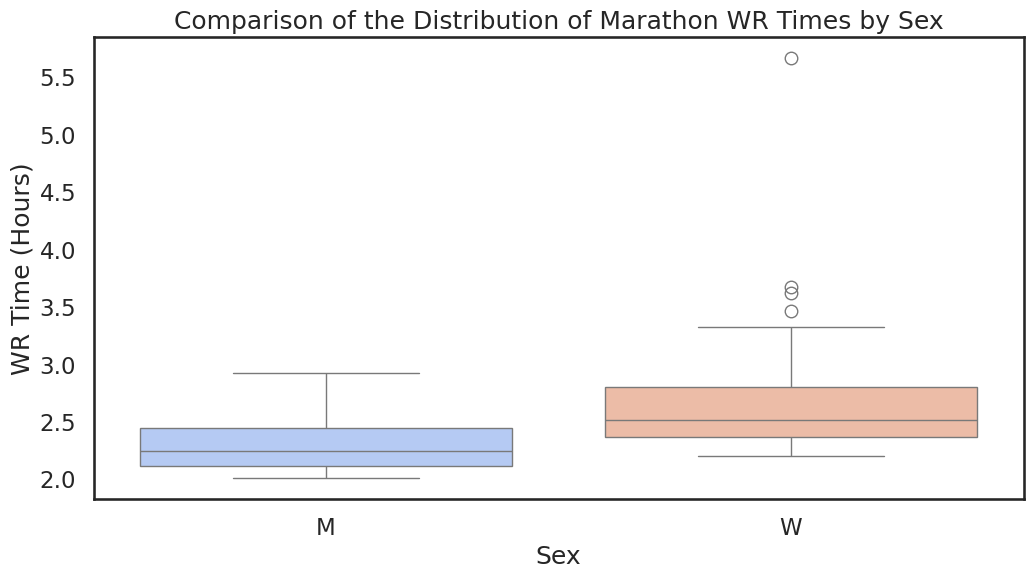

In [465]:
# Comparisons by Sex - Boxplots helps in checking outliers and the distribution of the data
plt.figure(figsize=(16, 7))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Sex", y=marathon_data_df["Time"].dt.total_seconds() / 3600, data=marathon_data_df, palette="coolwarm", hue="Sex")
plt.title("Comparison of the Distribution of Marathon WR Times by Sex")
plt.xlabel("Sex")
plt.ylabel("WR Time (Hours)")
plt.show()

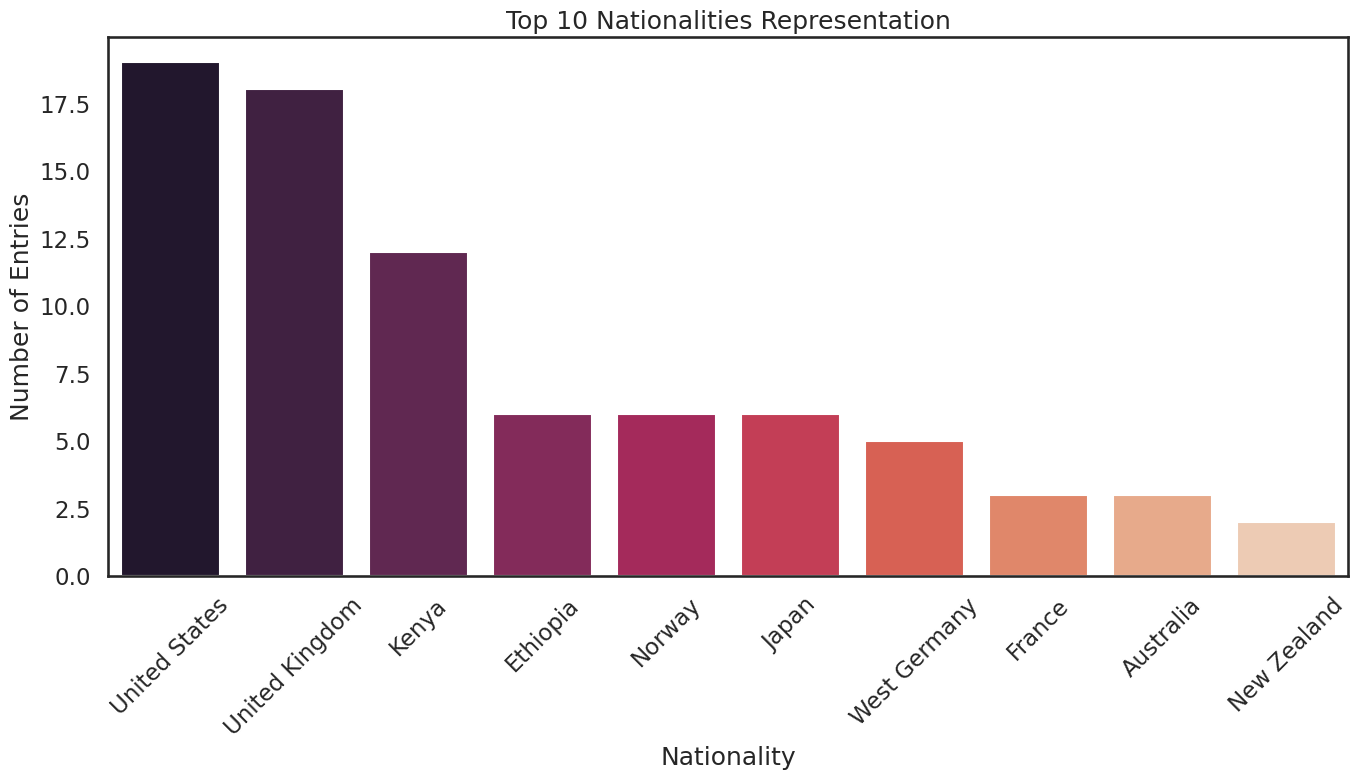

In [466]:
# Top Nationalities Distribution
# Nationality Representation
plt.figure(figsize=(16, 7))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")
top_nationalities = marathon_data_df["Nationality"].value_counts().nlargest(10)
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette="rocket", hue=top_nationalities.index)
plt.title("Top 10 Nationalities Representation")
plt.xlabel("Nationality")
plt.xticks(rotation=45)
plt.ylabel("Number of Entries")
plt.show()

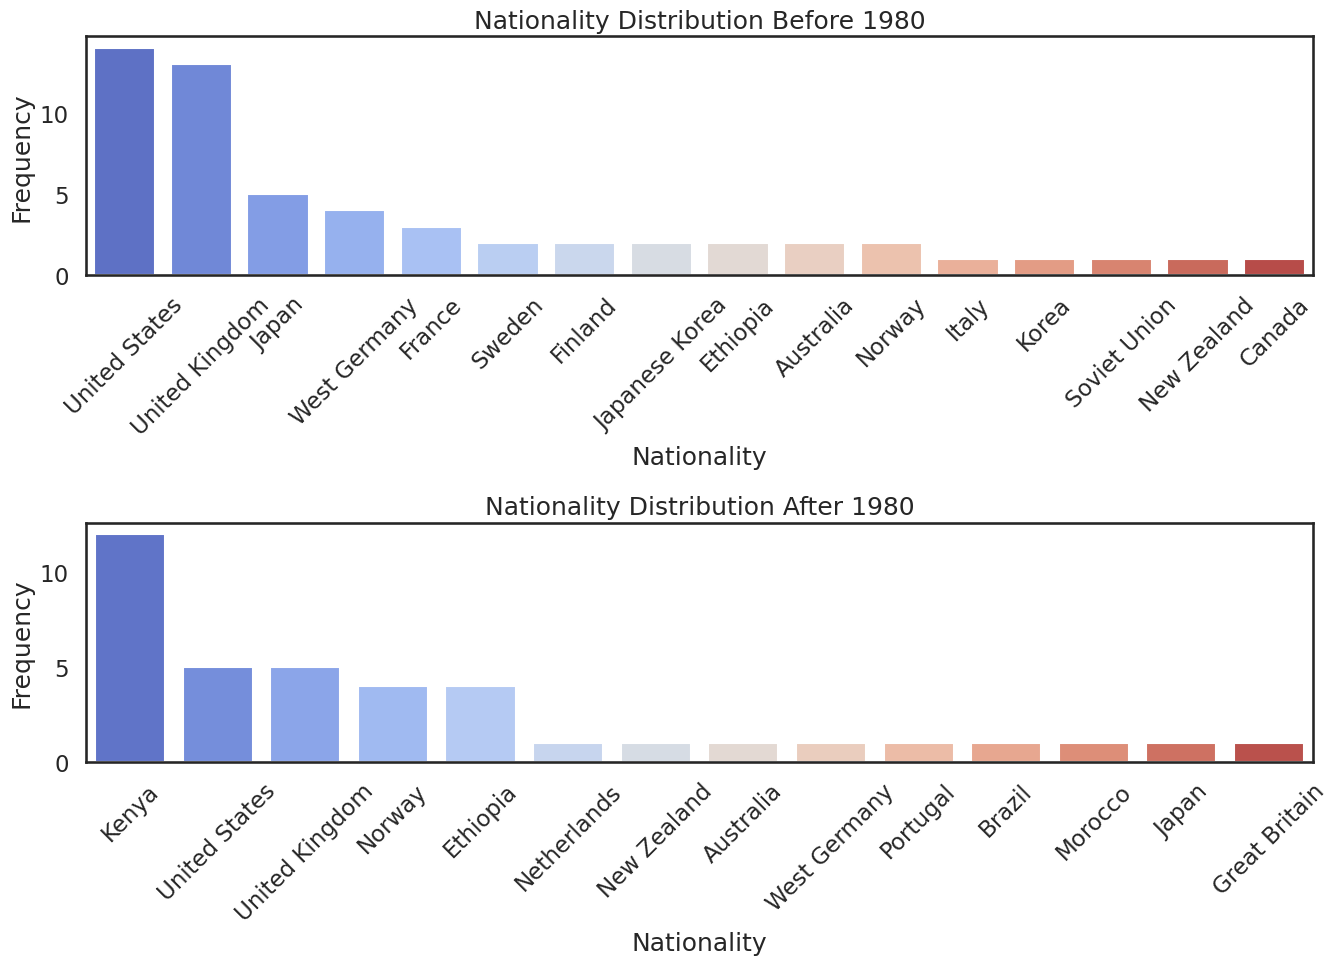

In [468]:
# Nationality Representation before and after 1980
# Splitting the data into two groups: before and after 1980
before_1980 = marathon_data_df[marathon_data_df["Date"].dt.year < 1980]
after_1980 = marathon_data_df[marathon_data_df["Date"].dt.year >= 1980]

# Plotting the nationality distribution for these two periods
plt.figure(figsize=(14, 10))



# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

# Nationality distribution before 1980
plt.subplot(2, 1, 1)
nationalities_before_1980 = before_1980["Nationality"].value_counts()
sns.barplot(
    x=nationalities_before_1980.index,
    y=nationalities_before_1980.values,
    palette="coolwarm", hue=nationalities_before_1980.index
)
plt.title("Nationality Distribution Before 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Nationality distribution after 1980
plt.subplot(2, 1, 2)
nationalities_after_1980 = after_1980["Nationality"].value_counts()
sns.barplot(
    x=nationalities_after_1980.index,
    y=nationalities_after_1980.values,
    palette="coolwarm", hue=nationalities_after_1980.index
)
plt.title("Nationality Distribution After 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

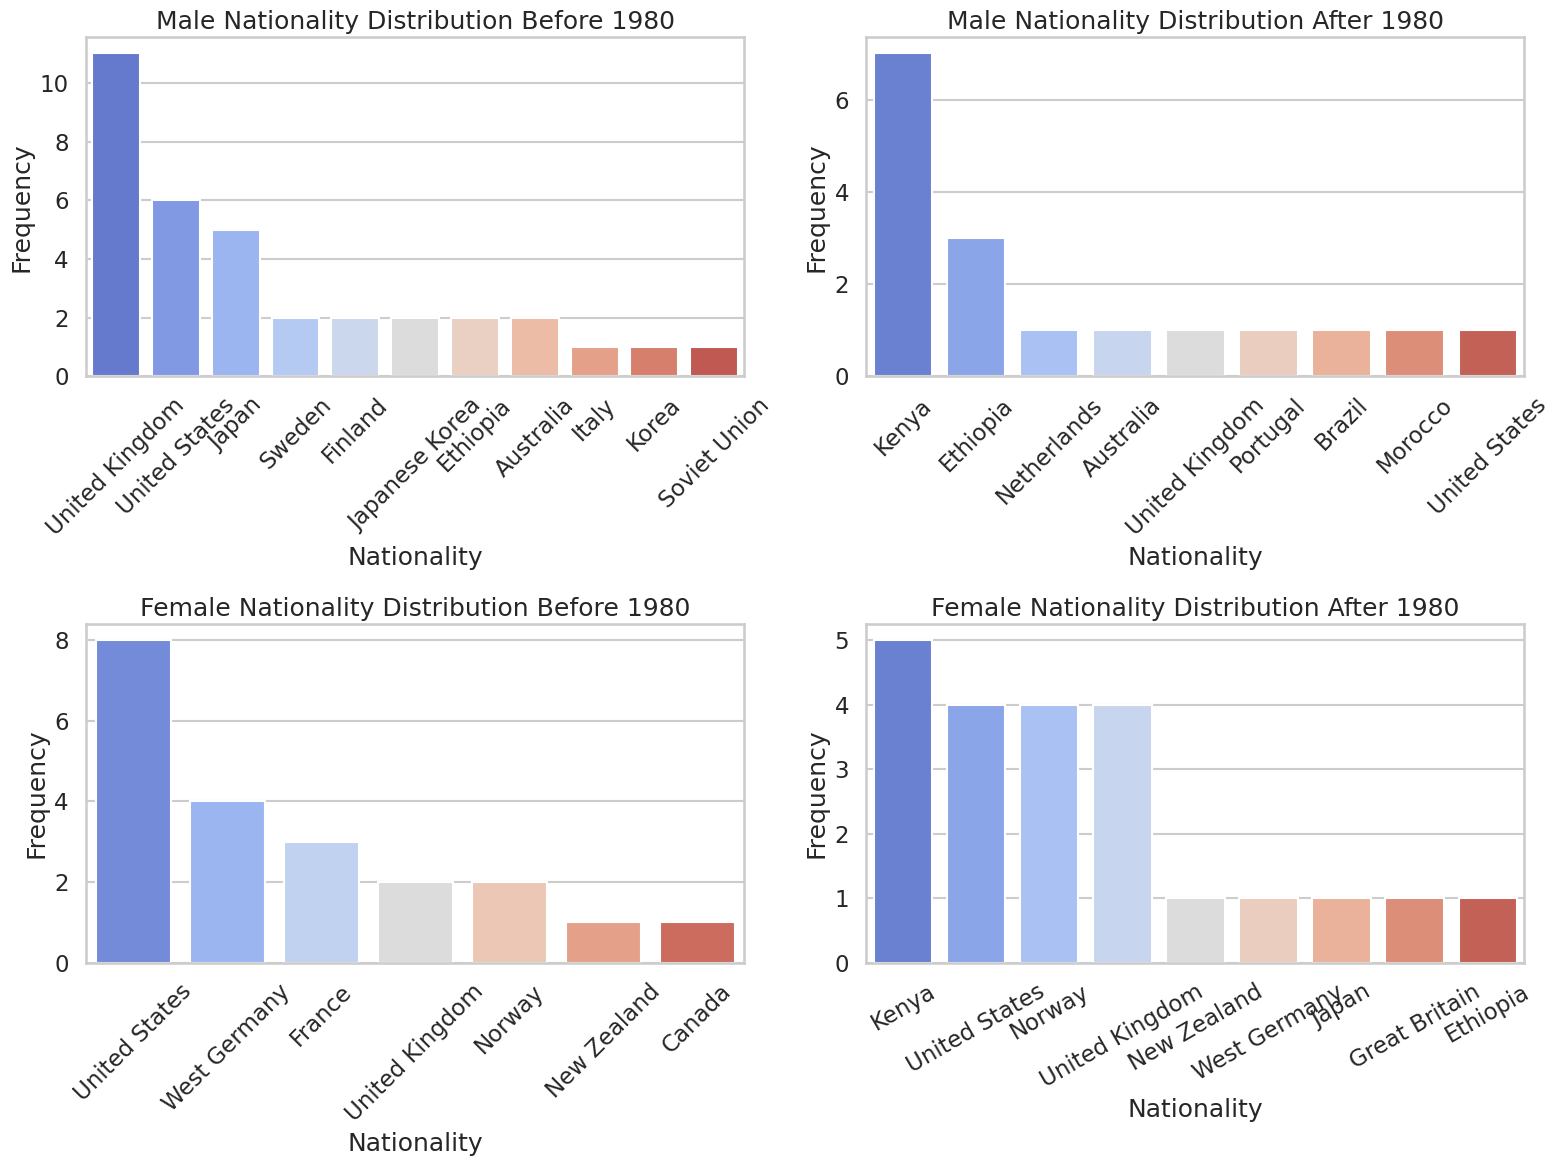

In [469]:
# Creating a 4-grid plot to show nationality distributions before and after 1980, for both males and females

plt.figure(figsize=(16, 12))
sns.set_style("whitegrid")
sns.set_context("talk")

# Nationality distribution before 1980 for Males
plt.subplot(2, 2, 1)
nationalities_before_1980_males = before_1980[before_1980["Sex"] == "M"][
    "Nationality"
].value_counts()
sns.barplot(
    x=nationalities_before_1980_males.index,
    y=nationalities_before_1980_males.values,
    palette="coolwarm", hue=nationalities_before_1980_males.index
)
plt.title("Male Nationality Distribution Before 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Nationality distribution after 1980 for Males
plt.subplot(2, 2, 2)
nationalities_after_1980_males = after_1980[after_1980["Sex"] == "M"][
    "Nationality"
].value_counts()
sns.barplot(
    x=nationalities_after_1980_males.index,
    y=nationalities_after_1980_males.values,
    palette="coolwarm", hue=nationalities_after_1980_males.index
)
plt.title("Male Nationality Distribution After 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Nationality distribution before 1980 for Females
plt.subplot(2, 2, 3)
nationalities_before_1980_females = before_1980[before_1980["Sex"] == "W"][
    "Nationality"
].value_counts()
sns.barplot(
    x=nationalities_before_1980_females.index,
    y=nationalities_before_1980_females.values,
    palette="coolwarm", hue=nationalities_before_1980_females.index
)
plt.title("Female Nationality Distribution Before 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Nationality distribution after 1980 for Females
plt.subplot(2, 2, 4)
nationalities_after_1980_females = after_1980[after_1980["Sex"] == "W"][
    "Nationality"
].value_counts()
sns.barplot(
    x=nationalities_after_1980_females.index,
    y=nationalities_after_1980_females.values,
    palette="coolwarm", hue=nationalities_after_1980_females.index
)
plt.title("Female Nationality Distribution After 1980")
plt.xlabel("Nationality")
plt.ylabel("Frequency")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


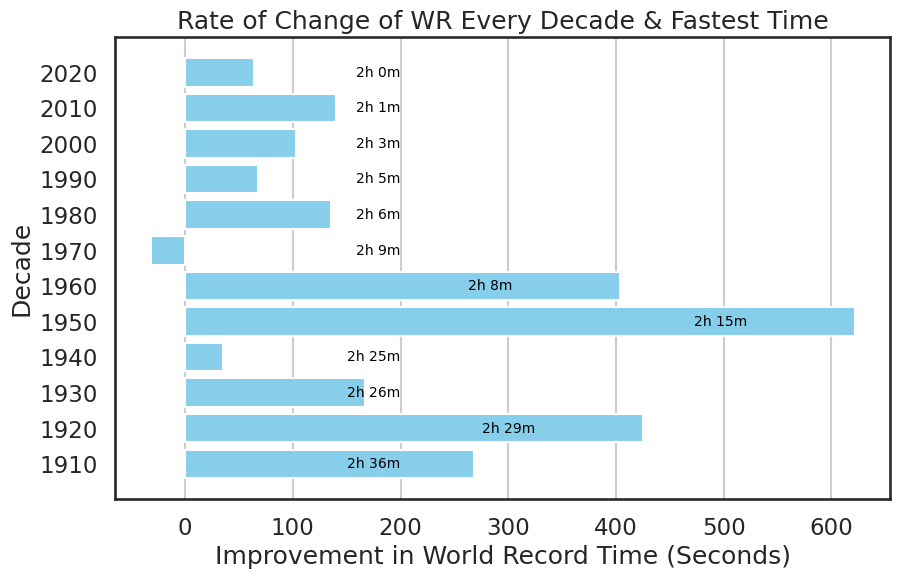

In [470]:
# Rate of change in world record marathon times per decade
# Plotting the Rate of Change as a Horizontal Bar Chart

# Step 1: Identify World Records (fastest times per year)
world_records = (
    marathon_data_df.groupby(marathon_data_df["Date"].dt.year)["Time_seconds"].min().reset_index()
)

# Step 2: Group by Decade
# Adding a 'Decade' column
world_records["Decade"] = (world_records["Date"] // 10) * 10

# Finding the fastest time per decade to represent the world record for that decade
decade_world_records = (
    world_records.groupby("Decade")["Time_seconds"].min().reset_index()
)

# Step 3: Calculate Rate of Change
# Calculating the difference in world record times between decades
decade_world_records["Time_change"] = decade_world_records["Time_seconds"].diff()

# Since we're interested in the rate of improvement, we'll take the negative of time changes (as faster times are lower values)
decade_world_records["Improvement_rate"] = -decade_world_records["Time_change"]


# Step 4: Plot the Rate of Change
plt.figure(figsize=(10, 6))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

bars = plt.barh(
    decade_world_records["Decade"].astype(str),
    decade_world_records["Improvement_rate"],
    color="skyblue",
)

# Adjusting annotation placement to ensure visibility within the plot area
for bar, record_time in zip(bars, decade_world_records['Time_seconds']):
    time_in_hours = f"{int(record_time // 3600)}h {int((record_time % 3600) // 60)}m"
    # Ensuring annotation is placed within the bar; if the bar is too short, place the annotation outside
    text_position = max(bar.get_width() - 100, 200)
    plt.text(text_position, bar.get_y() + bar.get_height() / 2, time_in_hours,
            va='center', ha='right', color='black', fontsize=10)

plt.title("Rate of Change of WR Every Decade & Fastest Time")
plt.ylabel("Decade")
plt.xlabel("Improvement in World Record Time (Seconds)")
plt.grid(axis="x")

plt.show()

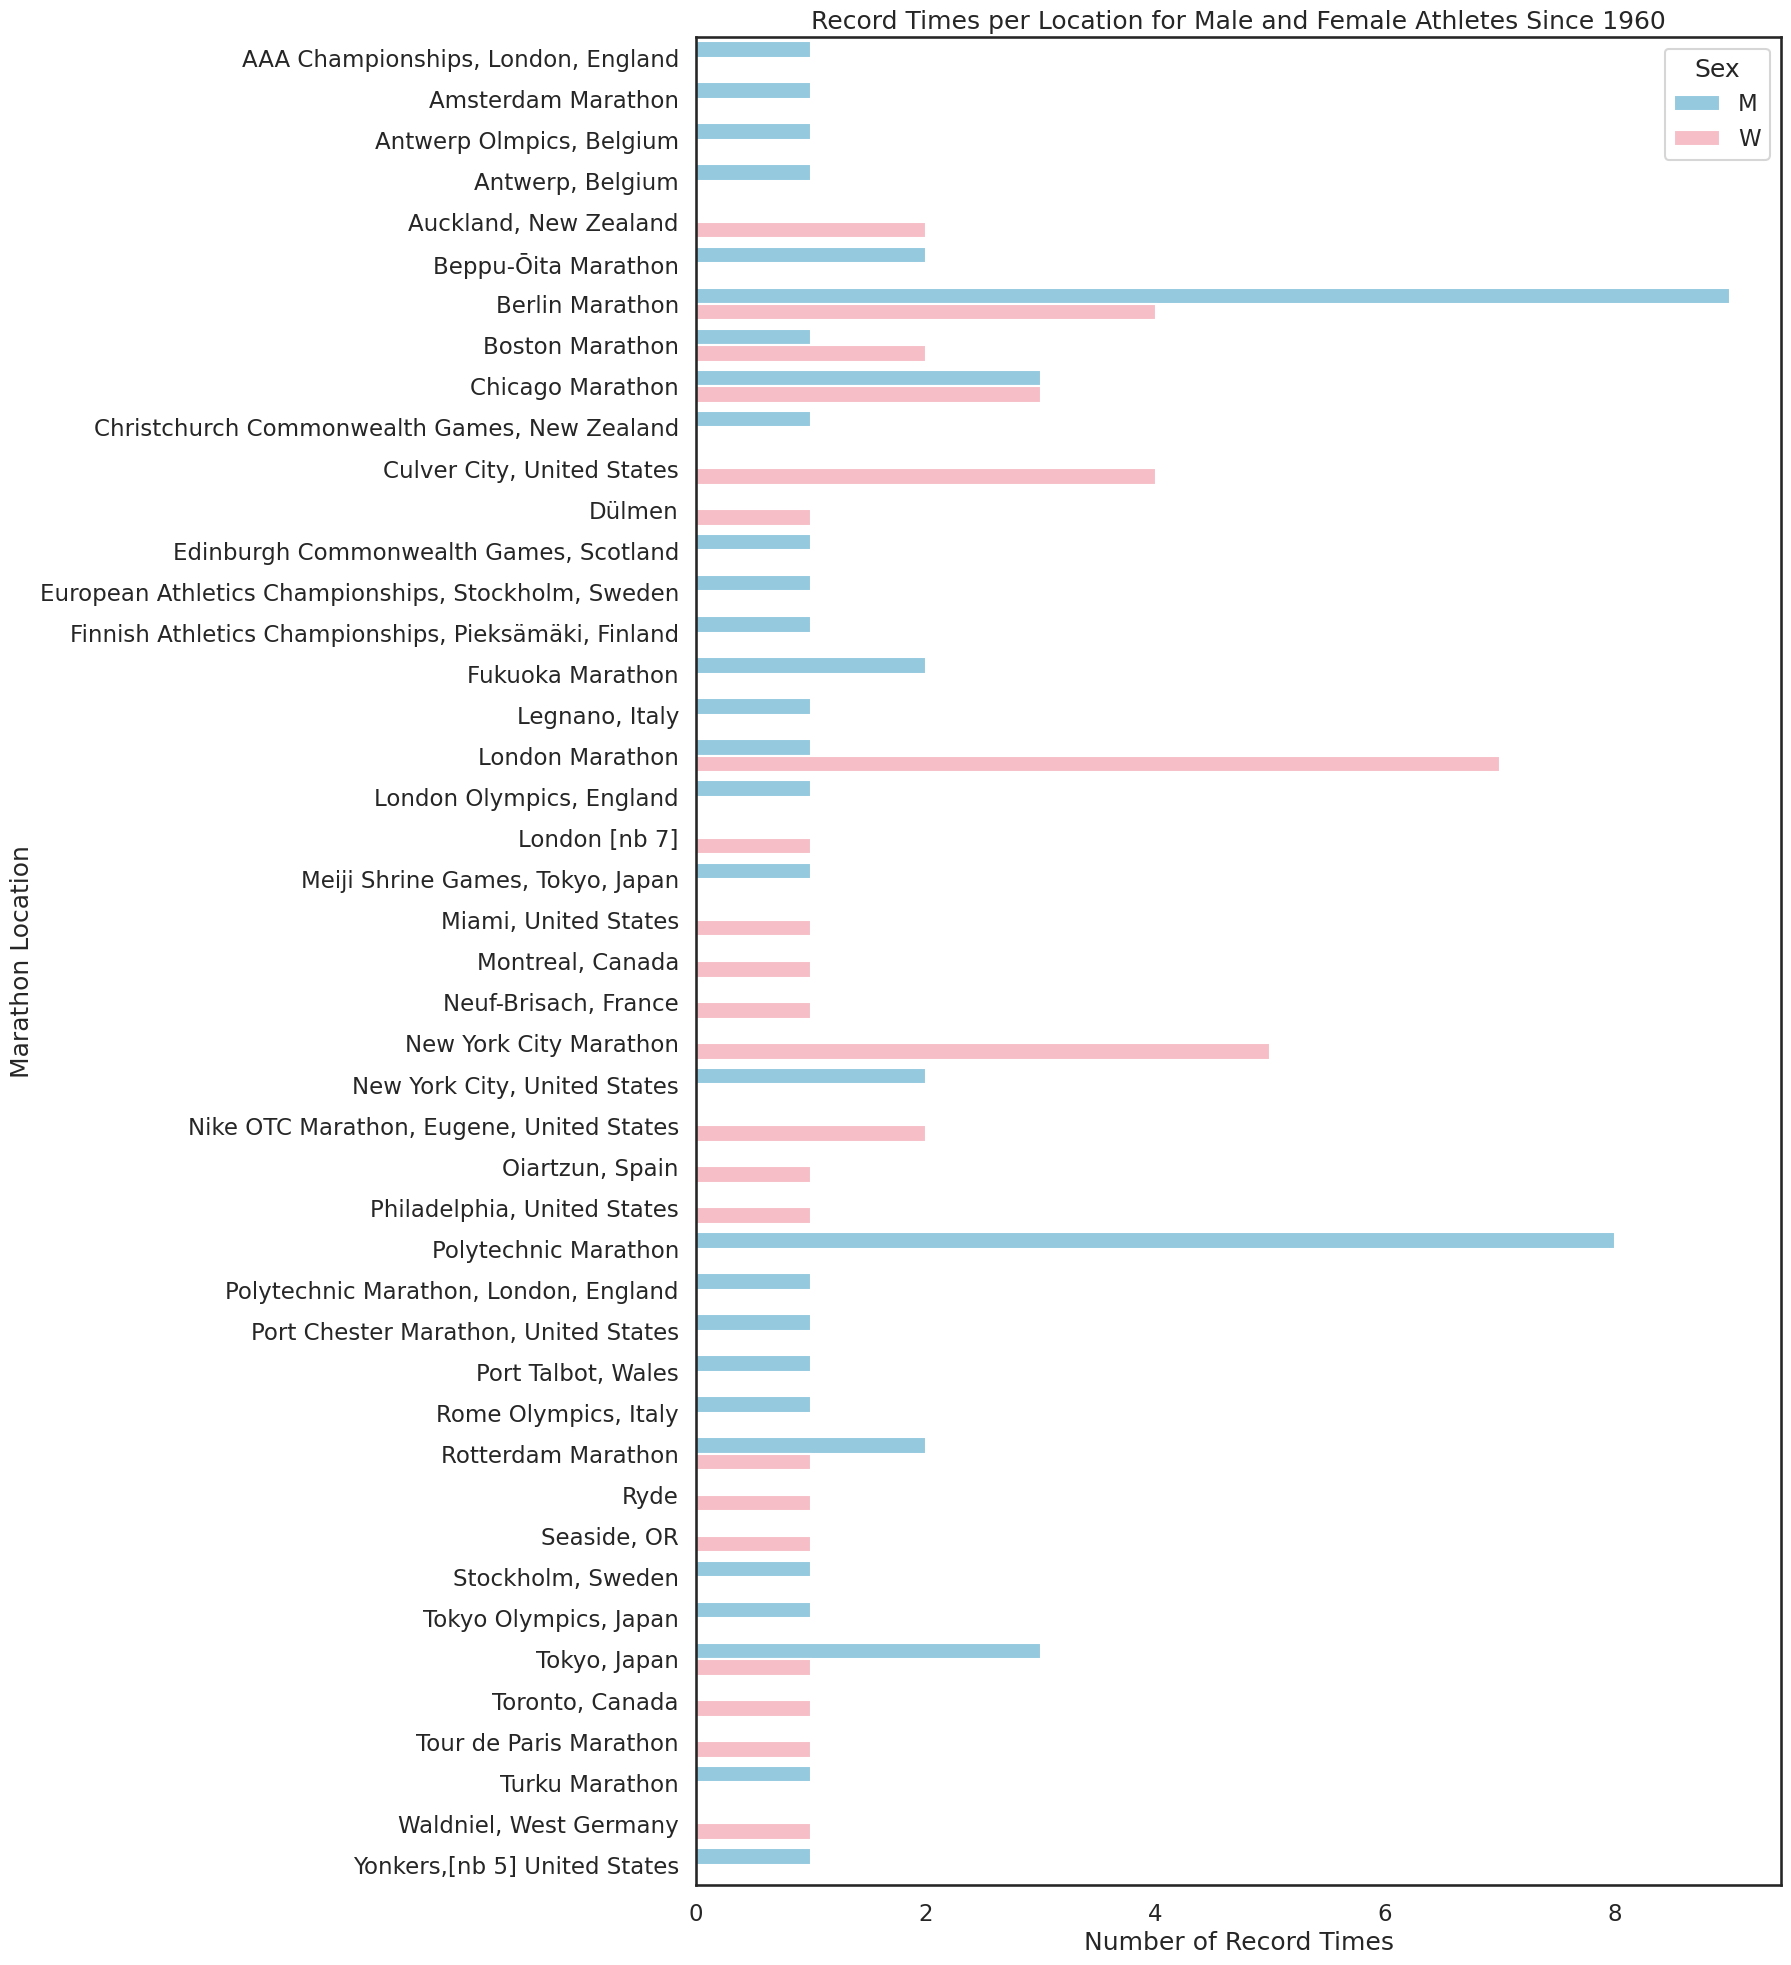

In [471]:
# Record time per location
# Plotting record times per location for both male and female

# First, let's prepare the data by grouping by both location and sex, then counting the records
record_times_by_sex = (
    marathon_data_df.groupby(["Event/Place", "Sex"])["Time"].count().reset_index()
)

plt.figure(figsize=(14, 24))

# Setting up the aesthetics for the plots
sns.set_style("white")
sns.set_context("talk")

sns.barplot(
    x="Time",
    y="Event/Place",
    hue="Sex",
    data=record_times_by_sex,
    palette={"M": "skyblue", "W": "lightpink"},
)
plt.title("Record Times per Location for Male and Female Athletes Since 1960")
plt.xlabel("Number of Record Times")
plt.ylabel("Marathon Location")
plt.legend(title="Sex")

plt.show()

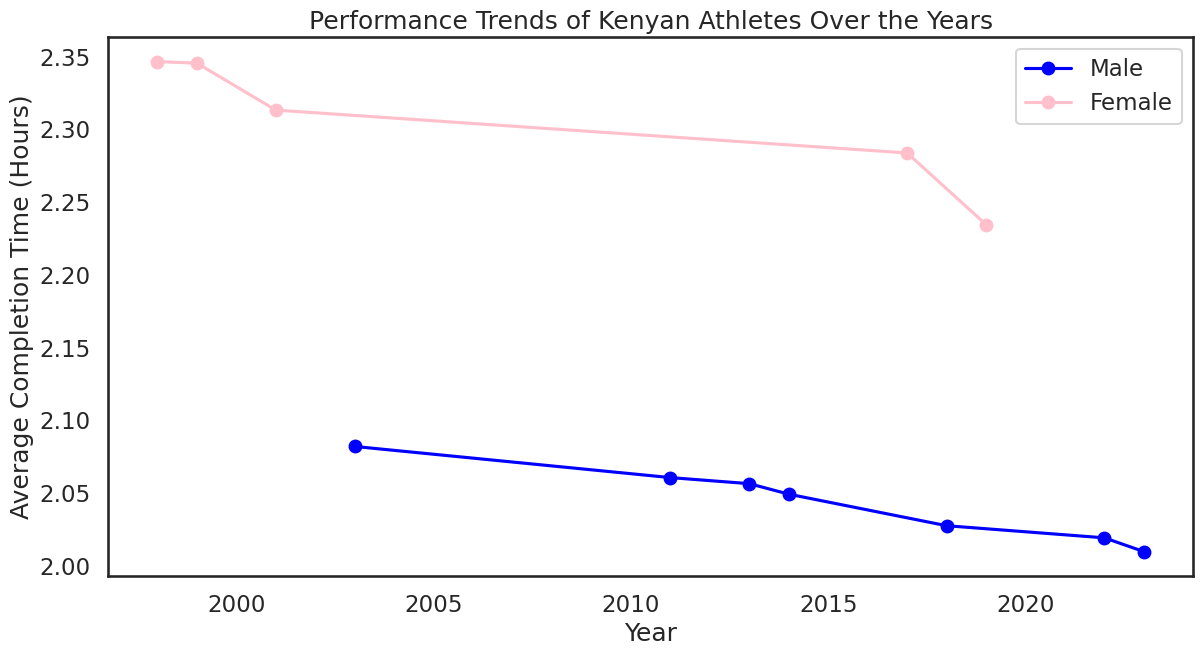

(7356.571428571428,
 8296.4,
 Date
 2003    7495.0
 2011    7418.0
 2013    7403.0
 2014    7377.0
 2018    7299.0
 2022    7269.0
 2023    7235.0
 Name: Time_seconds, dtype: float64,
 Date
 1998    8447.0
 1999    8443.0
 2001    8327.0
 2017    8221.0
 2019    8044.0
 Name: Time_seconds, dtype: float64)

In [380]:
# Filter the data for Kenyan athletes and analyze their performance
kenya_athletes = marathon_data_df[marathon_data_df["Nationality"] == "Kenya"]

# Split into male and female athletes
kenya_male = kenya_athletes[kenya_athletes["Sex"] == "M"]
kenya_female = kenya_athletes[kenya_athletes["Sex"] == "W"]

# Overall Performance: Average completion times
avg_time_male = kenya_male["Time_seconds"].mean()
avg_time_female = kenya_female["Time_seconds"].mean()

# Trends Over Time: Average completion times by year for Kenyan athletes
trends_male = kenya_male.groupby(kenya_male["Date"].dt.year)["Time_seconds"].mean()
trends_female = kenya_female.groupby(kenya_female["Date"].dt.year)[
    "Time_seconds"
].mean()

# Plotting the trends
plt.figure(figsize=(14, 7))

# Beutifying the plot
sns.set_style("white")
sns.set_context("talk")

# Male
plt.plot(
    trends_male.index, trends_male.values / 3600, label="Male", marker="o", color="blue"
)

# Female
plt.plot(
    trends_female.index,
    trends_female.values / 3600,
    label="Female",
    marker="o",
    color="pink",
)

plt.title("Performance Trends of Kenyan Athletes Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Completion Time (Hours)")
plt.legend()


plt.show()

avg_time_male, avg_time_female, trends_male, trends_female

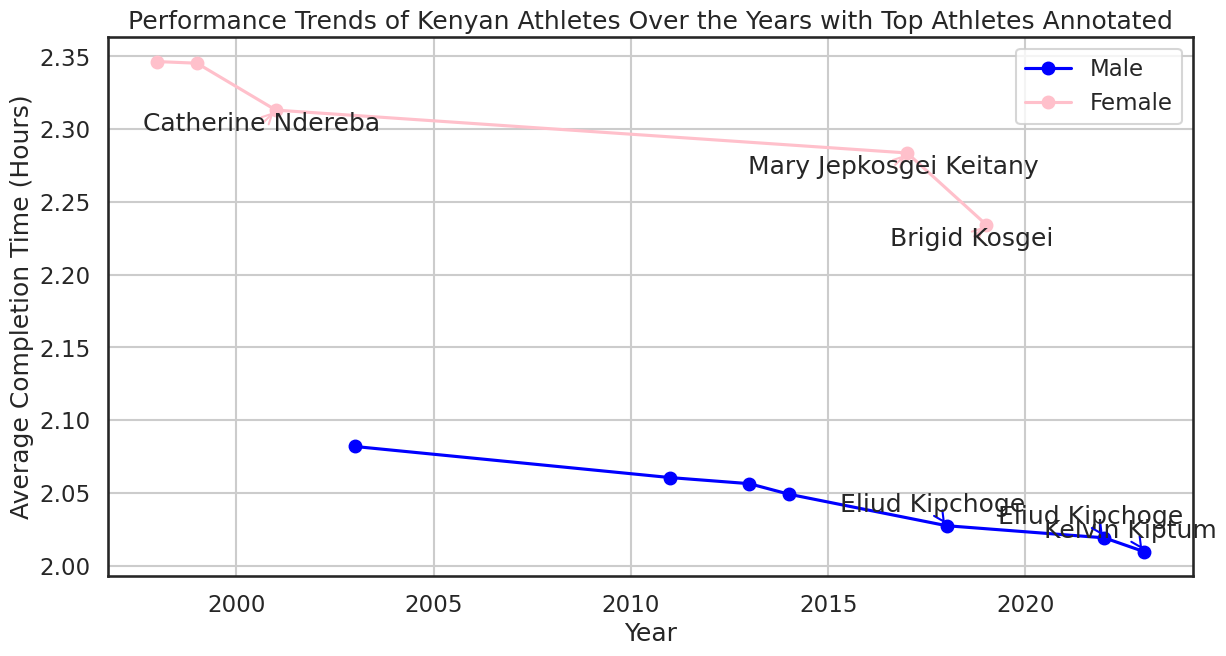

In [472]:
# Annotating top Kenyan athletes in the plot
# Filter the data for Kenyan athletes and analyze their performance
kenya_athletes = marathon_data_df[marathon_data_df["Nationality"] == "Kenya"]

# Split into male and female athletes
kenya_male = kenya_athletes[kenya_athletes["Sex"] == "M"]
kenya_female = kenya_athletes[kenya_athletes["Sex"] == "W"]

# Annotating top Kenyan athletes in the plot
# We'll highlight a few standout performances by annotating specific athletes on the trend plot.

# Preparing data for annotation by selecting top performances
top_male_athletes = kenya_male.nsmallest(3, "Time_seconds")
top_female_athletes = kenya_female.nsmallest(3, "Time_seconds")

plt.figure(figsize=(14, 7))

# Beutifying the plot
sns.set_style("white")
sns.set_context("talk")

# Plotting trends with annotations
# Male
plt.plot(
    trends_male.index, trends_male.values / 3600, label="Male", marker="o", color="blue"
)
for _, row in top_male_athletes.iterrows():
    plt.annotate(
        row["Name"],
        (row["Date"].year, row["Time_seconds"] / 3600),
        textcoords="offset points",
        xytext=(-10, 10),
        ha="center",
        arrowprops=dict(arrowstyle="->", color="blue"),
    )

# Female
plt.plot(
    trends_female.index,
    trends_female.values / 3600,
    label="Female",
    marker="o",
    color="pink",
)
for _, row in top_female_athletes.iterrows():
    plt.annotate(
        row["Name"],
        (row["Date"].year, row["Time_seconds"] / 3600),
        textcoords="offset points",
        xytext=(-10, -15),
        ha="center",
        arrowprops=dict(arrowstyle="->", color="pink"),
    )

plt.title(
    "Performance Trends of Kenyan Athletes Over the Years with Top Athletes Annotated"
)
plt.xlabel("Year")
plt.ylabel("Average Completion Time (Hours)")
plt.legend()
plt.grid(True)

plt.show()